In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [143]:
titanic_df=pd.read_csv(r'C:\Users\PC\Desktop\새 폴더\train.csv')

In [144]:
titanic_df['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
E101           3
F33            3
              ..
B3             1
C45            1
C86            1
C82            1
C47            1
Name: Cabin, Length: 147, dtype: int64

In [145]:
#문자형을 숫자형데이터로 변형하는 함수
def encode_features(df):
    #df['Cabin']=df['Cabin'].str[:1]
    features=['Sex','Cabin','Embarked']
    for feature in features:
        le=LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df
#NULL처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df
#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df
#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df=fillna(df)
    df=encode_features(df)
    df=drop_features(df)
    return df


In [79]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    def predict(self,X):
        pred=np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i]==1:
                pred[i]=0
            else:
                pred[i]=1
        return pred

In [43]:
from sklearn.model_selection import train_test_split

In [71]:
titanic_df=pd.read_csv(r'C:\Users\PC\Desktop\새 폴더\train.csv')


In [146]:
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)
X_titanic_df=transform_features(X_titanic_df)

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=0)

In [80]:
my_clf=MyDummyClassifier()
my_clf.fit(X_train,y_train)
pred=my_clf.predict(X_test)
print('Dummy Classifier의 정확도 : {0}'.format(accuracy_score(y_test,pred)))

Dummy Classifier의 정확도 : 0.7877094972067039


In [133]:
from sklearn.datasets import load_digits

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

digits=load_digits()

y=(digits.target==7).astype(int)
X_train,X_test,y_train,y_test=train_test_split(digits.data,y,random_state=11)

In [126]:
print('레이블(target)테스트 세트 크기:',y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도:\n',pd.Series(y_test).value_counts())

레이블(target)테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도:
 0    405
1     45
dtype: int64


In [134]:
fake_clf=MyFakeClassifier()
fake_clf.fit(X_train,y_train)
pred=fake_clf.predict(X_test)
accuracy_score(y_test,pred)

0.9

In [137]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
confusion_matrix(y_test,pred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [147]:
X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)
lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [148]:
def get_clf_eval(y_test,pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('정확도:{0},정밀도:{1},재현율:{2}'.format(accuracy,precision,recall))

In [149]:
get_clf_eval(y_test,pred)

오차행렬
[[106  12]
 [ 13  48]]
정확도:0.8603351955307262,정밀도:0.8,재현율:0.7868852459016393


In [151]:
pred_proba=lr_clf.predict_proba(X_test)
print('pred_porba의 결과 Shape:',pred_proba.shape)
print('pred_proba array에서 앞 3개만 샘플로만 추출\n:',pred_proba[:3])

pred_porba의 결과 Shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로만 추출
: [[0.49823049 0.50176951]
 [0.87000696 0.12999304]
 [0.85942673 0.14057327]]


In [154]:
print(X_test.shape,X_train.shape,y_train.shape,y_test.shape)

(179, 8) (712, 8) (712,) (179,)


In [164]:
#예측 확률 array와 예측 결과값 array를 병합(concatenate)해 예측확률과 결과값을 한눈에 확인
pred_proba_result=np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 :\n',pred_proba_result[:9])

두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 :
 [[0.49823049 0.50176951 1.        ]
 [0.87000696 0.12999304 0.        ]
 [0.85942673 0.14057327 0.        ]
 [0.88643865 0.11356135 0.        ]
 [0.8707261  0.1292739  0.        ]
 [0.89355547 0.10644453 0.        ]
 [0.88157912 0.11842088 0.        ]
 [0.17083862 0.82916138 1.        ]
 [0.7897096  0.2102904  0.        ]]


In [181]:
pred_proba[:,1].reshape(-1,1)

array([[0.50176951],
       [0.12999304],
       [0.14057327],
       [0.11356135],
       [0.1292739 ],
       [0.10644453],
       [0.11842088],
       [0.82916138],
       [0.2102904 ],
       [0.58325184],
       [0.08871554],
       [0.1322184 ],
       [0.14057872],
       [0.11846011],
       [0.53701701],
       [0.15371203],
       [0.10535701],
       [0.26951181],
       [0.19868553],
       [0.87897542],
       [0.24678123],
       [0.36211774],
       [0.15896203],
       [0.24682617],
       [0.11877688],
       [0.23372804],
       [0.13027443],
       [0.0829225 ],
       [0.28521973],
       [0.22941097],
       [0.93814846],
       [0.76309635],
       [0.16241563],
       [0.86985925],
       [0.35798174],
       [0.23372804],
       [0.07596984],
       [0.58542227],
       [0.04937583],
       [0.1093533 ],
       [0.41881587],
       [0.09451968],
       [0.76910895],
       [0.6662461 ],
       [0.62994636],
       [0.62995958],
       [0.90781375],
       [0.380

In [165]:
from sklearn.preprocessing import Binarizer

In [167]:
X=[[1,-1,2],
  [2,0,0],
  [0,1.1,1.2]]
#X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer=Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [183]:
#Binarizer의 threshold설정값. 분류 결정 임계값
custom_threshold=0.4
#predict_proba()반환값의 두번째 칼럼, 즉 Positive클래스 칼럼 하나만 추출해 Binarizer적용
pred_proba1=pred_proba[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba1)
custom_predict=binarizer.transform(pred_proba1)

get_clf_eval(y_test,custom_predict)
#임계값은 Positive 예측값을 결정하는 확률의 기준이 된다.확률이 0.5가 아닌 0.4부터 Positive로 예측을 더 너그럽게 하기 
#때문에 임계값을 낮출수록 True값이 많아지게 된다.

오차행렬
[[97 21]
 [12 49]]
정확도:0.8156424581005587,정밀도:0.7,재현율:0.8032786885245902


In [184]:
#Positive 예측값이 많아지면 상대적으로 재현율이 높아진다.

In [185]:
thresholds=[0.4,0.45,0.5,0.55,0.60]

def get_eval_by_threshold(y_test,pred_proba_c1,threshold):
    for custom_threshold in thresholds:
        binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict=binarizer.transform(pred_proba_c1)
        print('임계값:',custom_threshold)
        get_clf_eval(y_test,custom_predict)
        
        
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값: 0.4
오차행렬
[[97 21]
 [12 49]]
정확도:0.8156424581005587,정밀도:0.7,재현율:0.8032786885245902
임계값: 0.45
오차행렬
[[103  15]
 [ 13  48]]
정확도:0.8435754189944135,정밀도:0.7619047619047619,재현율:0.7868852459016393
임계값: 0.5
오차행렬
[[106  12]
 [ 13  48]]
정확도:0.8603351955307262,정밀도:0.8,재현율:0.7868852459016393
임계값: 0.55
오차행렬
[[110   8]
 [ 15  46]]
정확도:0.8715083798882681,정밀도:0.8518518518518519,재현율:0.7540983606557377
임계값: 0.6
오차행렬
[[113   5]
 [ 17  44]]
정확도:0.8770949720670391,정밀도:0.8979591836734694,재현율:0.7213114754098361


In [205]:
from sklearn.metrics import precision_recall_curve

#레이블값이1일 때의 예측 확률을 추출
pred_porba_class1=lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve인자로 입력
precisions,recalls,thresholds=precision_recall_curve(y_test,pred_porba_class1)
print('반환된 분류 결정 임계값 배열의 shape:',thresholds.shape)

#반환된 임계값 배열 row가 142건이므로 샘플로 10건만 추출하되, 임계값을 15step 으로 추출
thr_index=np.arange(0,thresholds.shape[0],15)
print('샘플 추출을 위한 임계값 배열의 index 10개: ',thr_index)
print('샘플용 10개의 임계값:',np.round(thresholds[thr_index],2))

#15step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플임계값별 정밀도:',np.round(precision[thr_index],3))
print('샘플임계값별 재현율:',np.round(recalls[thr_index],3))

반환된 분류 결정 임계값 배열의 shape: (142,)
샘플 추출을 위한 임계값 배열의 index 10개:  [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값: [0.11 0.13 0.15 0.2  0.29 0.41 0.56 0.67 0.82 0.93]
샘플임계값별 정밀도: [0.391 0.451 0.47  0.539 0.643 0.71  0.852 0.947 0.957 1.   ]
샘플임계값별 재현율: [1.    0.984 0.902 0.902 0.885 0.803 0.754 0.59  0.361 0.131]


In [198]:
thresholds[thr_index]

array([0.1093533 , 0.12999304, 0.15371203, 0.19507525, 0.28521973,
       0.41296918, 0.55770886, 0.67352265, 0.81773373, 0.93219428])

In [199]:
thresholds

array([0.1093533 , 0.10935521, 0.10937656, 0.11321247, 0.11351738,
       0.11356135, 0.11522132, 0.11842088, 0.11845255, 0.11846011,
       0.11877688, 0.11880638, 0.12036448, 0.12890632, 0.1292739 ,
       0.12999304, 0.13027443, 0.1322184 , 0.13452668, 0.1368114 ,
       0.13863139, 0.14052362, 0.14057327, 0.14057422, 0.14057872,
       0.14378535, 0.14391726, 0.1439271 , 0.14413042, 0.1441333 ,
       0.15371203, 0.15375303, 0.15375914, 0.15732608, 0.15896203,
       0.16027994, 0.16241563, 0.16428691, 0.16781807, 0.16968824,
       0.17657992, 0.1834338 , 0.18701763, 0.19319287, 0.19337598,
       0.19507525, 0.19507556, 0.19868553, 0.20065348, 0.20256093,
       0.2102904 , 0.22941097, 0.23372804, 0.23627415, 0.24215401,
       0.24678123, 0.24682617, 0.26951181, 0.27866472, 0.28498037,
       0.28521973, 0.29131199, 0.29981079, 0.30821757, 0.3182243 ,
       0.32379927, 0.32663238, 0.3343652 , 0.35798174, 0.36211774,
       0.37088293, 0.38008551, 0.38773432, 0.39229787, 0.41002

In [203]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

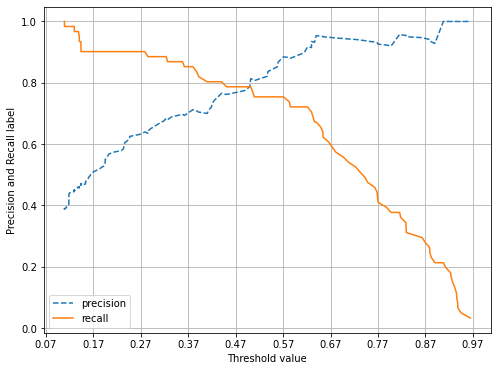

In [210]:
def precision_recalll_curve_plot(y_test,pred_proba_c1):
    precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value');plt.ylabel('Precision and Recall label')
    plt.legend();plt.grid()
    plt.show()
    
precision_recalll_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

In [206]:
precisions[0:2]

array([0.39102564, 0.38709677])

In [211]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,pred)
f1

0.7933884297520661

In [214]:
def get_clf_eval(y_test,pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1=f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('정확도:{0},정밀도:{1},재현율:{2},f1 score:{3}'.format(accuracy,precision,recall,f1))

In [215]:
thresholds=[0.4,0.45,0.5,0.55,0.60]

def get_eval_by_threshold(y_test,pred_proba_c1,threshold):
    for custom_threshold in thresholds:
        binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict=binarizer.transform(pred_proba_c1)
        print('임계값:',custom_threshold)
        get_clf_eval(y_test,custom_predict)
        
        
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값: 0.4
오차행렬
[[97 21]
 [12 49]]
정확도:0.8156424581005587,정밀도:0.7,재현율:0.8032786885245902,f1 score:0.7480916030534351
임계값: 0.45
오차행렬
[[103  15]
 [ 13  48]]
정확도:0.8435754189944135,정밀도:0.7619047619047619,재현율:0.7868852459016393,f1 score:0.7741935483870968
임계값: 0.5
오차행렬
[[106  12]
 [ 13  48]]
정확도:0.8603351955307262,정밀도:0.8,재현율:0.7868852459016393,f1 score:0.7933884297520661
임계값: 0.55
오차행렬
[[110   8]
 [ 15  46]]
정확도:0.8715083798882681,정밀도:0.8518518518518519,재현율:0.7540983606557377,f1 score:0.7999999999999999
임계값: 0.6
오차행렬
[[113   5]
 [ 17  44]]
정확도:0.8770949720670391,정밀도:0.8979591836734694,재현율:0.7213114754098361,f1 score:0.8


In [216]:
from sklearn.metrics import roc_curve

In [219]:
#레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

FPR,TPR, thresholds=roc_curve(y_test,pred_porba_class1)
#반환된 임계값 배열로우가 47건 이므로 샘플로 10건만 추출하되, 임계값을 5step으로 추출
thr_index=np.arange(0,thresholds.shape[0],5)
print('샘플추출을 위한 임계값 배열의 index 10개:',thr_index)
print('샘플용 10개의 임계값:',np.round(thresholds[thr_index],2))

#5step 단위로 추출된 임계값에 따른 FPR,TPR값
print('샘플 임계값별 FPR:',np.round(FPR[thr_index],2))
print('샘플 임계값별 TPR:',np.round(TPR[thr_index],2))

샘플추출을 위한 임계값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45]
샘플용 10개의 임계값: [1.96 0.8  0.62 0.45 0.36 0.24 0.14 0.14 0.12 0.01]
샘플 임계값별 FPR: [0.   0.02 0.03 0.13 0.19 0.31 0.53 0.58 0.67 1.  ]
샘플 임계값별 TPR: [0.   0.38 0.72 0.79 0.87 0.9  0.92 0.95 0.98 1.  ]


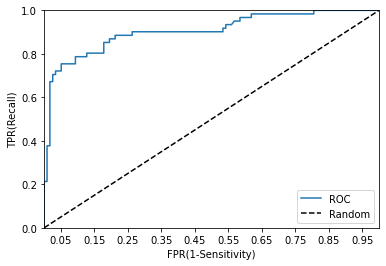

In [221]:
def roc_curve_plot(y_test,pred_proba_c1):
    fprs,tprs,thresholds=roc_curve(y_test,pred_proba_c1)
    #ROC곡선을 그래프 곡선으로 그림
    plt.plot(fprs,tprs,label='ROC')
    #가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1],'k--',label='Random')
    
    #FPR X축의 Scale을 0.1 단위로 변경, X,Y축 명 설정 등
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)');plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test,pred_proba[:,1])

In [222]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,pred)

0.842595165323701

In [131]:
print(pd.Series(digits.target).value_counts())
print(pd.DataFrame(digits.data).value_counts())

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
dtype: int64


AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [115]:
print(digits.data,'\n',digits.target)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] 
 [0 1 2 ... 8 9 8]


In [116]:
digits.data.shape

(1797, 64)

In [117]:
digits.target.shape

(1797,)

In [119]:
digits.target.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [41]:
iris_df['sepal length (cm)'].iloc[1]

4.9